<a href="https://colab.research.google.com/github/samuelllopes/AnimaCursoExtensaoAnalisedeDadosPythonPandas-2023-1/blob/main/Aula04_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

combustiveis_df = pd.read_excel("ca-2021-02.xlsx")
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


Inserção simples de dado

In [21]:
combustiveis_df['Ativo'] = True

display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


Criando coluna Obs melhor cidade


In [22]:
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,None
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


Preenchimento de coluna com acima da média e abaixo

In [23]:
import numpy as np

combustiveis_df['Valor de Venda - Status'] = np.where(combustiveis_df['Valor de Venda'] > 6.0, 'Acima da Média','Abaixo da Média')
display(combustiveis_df[['Valor de Venda - Status','Revenda','Valor de Venda']])

,Valor de Venda - Status,Revenda,Valor de Venda
0,Acima da Média,POSTO ARAPIRACA LTDA,6.799
1,Abaixo da Média,POSTO ARAPIRACA LTDA,5.299
2,Abaixo da Média,POSTO ARAPIRACA LTDA,5.549
3,Acima da Média,POSTO ARAPIRACA LTDA,6.899
4,Abaixo da Média,POSTO ARAPIRACA LTDA,5.649
...,...,...,...
168404,Abaixo da Média,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859
168405,Acima da Média,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580
168406,Abaixo da Média,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740
168407,Abaixo da Média,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448


Qtd de postos por cidade

In [24]:
word = "SAO PAULO"
count = combustiveis_df[combustiveis_df["Municipio"].str.contains(word)].shape[0]
display(count)


5220

add base habitantes e trocando nome da coluna

In [25]:
num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv",sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace = True)
display(num_habitantes_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


juntar duas bases

In [26]:
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,Acima da Média,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,Abaixo da Média,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,Acima da Média,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,Acima da Média,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,Abaixo da Média,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21646,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,Acima da Média,260690
21647,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,Abaixo da Média,260690
21648,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,Acima da Média,260690
21649,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,Abaixo da Média,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21651 entries, 0 to 21650
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           21651 non-null  object        
 1   Estado - Sigla           21651 non-null  object        
 2   Municipio                21651 non-null  object        
 3   Revenda                  21651 non-null  object        
 4   CNPJ da Revenda          21651 non-null  object        
 5   Nome da Rua              21651 non-null  object        
 6   Numero Rua               21651 non-null  object        
 7   Complemento              4083 non-null   object        
 8   Bairro                   21651 non-null  object        
 9   Cep                      21651 non-null  object        
 10  Produto                  21651 non-null  object        
 11  Data da Coleta           21651 non-null  datetime64[ns]
 12  Valor de Venda           21651 n

Remover duplicadas 

In [27]:
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,Acima da Média,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,Abaixo da Média,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,Acima da Média,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,Acima da Média,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,Abaixo da Média,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CO,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,AVENIDA T 63,1295,ESQUINA C/ AVENIDA T-15,NOVA SUIÇA,74280-235,GASOLINA,2021-11-04,7.270,NaN,R$ / litro,BRANCA,True,None,Acima da Média,1555626
96,CO,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,AVENIDA T 63,1295,ESQUINA C/ AVENIDA T-15,NOVA SUIÇA,74280-235,DIESEL S10,2021-11-04,5.570,NaN,R$ / litro,BRANCA,True,None,Abaixo da Média,1555626
97,CO,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,RUA C 125,356,QD.219 LT.03,JARDIM AMERICA,74255-470,ETANOL,2021-11-04,5.150,NaN,R$ / litro,BRANCA,True,None,Abaixo da Média,1555626
98,CO,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,RUA C 125,356,QD.219 LT.03,JARDIM AMERICA,74255-470,GASOLINA,2021-11-04,7.190,NaN,R$ / litro,BRANCA,True,None,Acima da Média,1555626


habitantes acima e abaixo da média

In [28]:
merge_df['Status Habitantes'] = np.where(merge_df['NumHabitantes2021'] > 500000, 'Acima da População','Abaixo da População')
display(merge_df[['Status Habitantes','Estado - Sigla','Municipio', 'NumHabitantes2021']])

,Status Habitantes,Estado - Sigla,Municipio,NumHabitantes2021
0,Acima da População,GO,GOIANIA,1555626
1,Acima da População,GO,GOIANIA,1555626
2,Acima da População,GO,GOIANIA,1555626
3,Acima da População,GO,GOIANIA,1555626
4,Acima da População,GO,GOIANIA,1555626
...,...,...,...,...
21646,Abaixo da População,SP,INDAIATUBA,260690
21647,Abaixo da População,SP,INDAIATUBA,260690
21648,Abaixo da População,SP,INDAIATUBA,260690
21649,Abaixo da População,SP,INDAIATUBA,260690


Agrupar e contar quantos postos tem na cidade

In [29]:
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)

postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['PostosPorHabitante'] = postos_por_municipio_df['NumPostos'] / postos_por_municipio_df['NumHabitantes2021']
display(postos_por_municipio_df.info())
display(postos_por_municipio_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estado - Sigla           17 non-null     object 
 1   Municipio                17 non-null     object 
 2   NumHabitantes2021        17 non-null     int64  
 3   Regiao - Sigla           17 non-null     int64  
 4   NumPostos                17 non-null     int64  
 5   Nome da Rua              17 non-null     int64  
 6   Numero Rua               17 non-null     int64  
 7   Complemento              17 non-null     int64  
 8   Bairro                   17 non-null     int64  
 9   Cep                      17 non-null     int64  
 10  Produto                  17 non-null     int64  
 11  Data da Coleta           17 non-null     int64  
 12  Valor de Venda           17 non-null     int64  
 13  Valor de Compra          17 non-null     int64  
 14  Unidade de Medida        17 

None

,Estado - Sigla,Municipio,NumHabitantes2021,Regiao - Sigla,NumPostos,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,...,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,Status Habitantes,PostosPorHabitante
0,AC,RIO BRANCO,419452,1090,1090,1090,1090,198,1090,1090,...,1090,1090,0,1090,1090,1090,0,1090,1090,0.002599
1,GO,GOIANIA,1555626,1667,1667,1667,1667,1369,1667,1667,...,1667,1667,0,1667,1667,1667,0,1667,1667,0.001072
2,MG,BELO HORIZONTE,2530701,827,827,827,827,32,827,827,...,827,827,0,827,827,827,0,827,827,0.000327
3,MG,BETIM,444784,406,406,406,406,180,406,406,...,406,406,0,406,406,406,0,406,406,0.000913
4,MG,CONTAGEM,668949,611,611,611,611,66,611,611,...,611,611,0,611,611,611,0,611,611,0.000913
5,MS,CAMPO GRANDE,916001,1606,1606,1606,1606,170,1606,1606,...,1606,1606,0,1606,1606,1606,0,1606,1606,0.001753
6,PR,CURITIBA,1963726,1291,1291,1291,1291,149,1291,1291,...,1291,1291,0,1291,1291,1291,0,1291,1291,0.000657
7,RJ,RIO DE JANEIRO,6775561,2445,2445,2445,2445,375,2445,2445,...,2445,2445,0,2445,2445,2445,0,2445,2445,0.000361
8,RN,NATAL,803739,1093,1093,1093,1093,270,1093,1093,...,1093,1093,0,1093,1093,1093,0,1093,1093,0.001360
9,RO,PORTO VELHO,548952,805,805,805,805,28,805,805,...,805,805,0,805,805,805,0,805,805,0.001466


Primeiro Gráfico

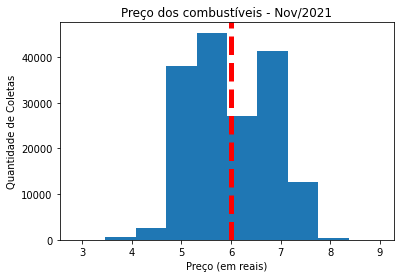

In [30]:
import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])
#Vamos colocar um título no gráfico
plt.title("Preço dos combustíveis - Nov/2021")
#Rótulo horizontal e vertical
plt.xlabel("Preço (em reais)")
plt.ylabel("Quantidade de Coletas")

#Traça a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=5)


#"Plota" o gráfico
plt.show()

Consumo médio

In [31]:
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

Segundo Gráfico

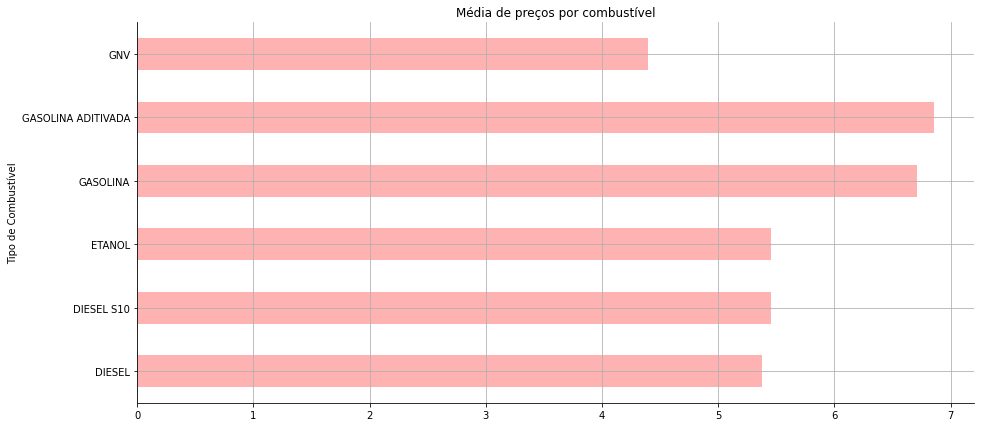

In [32]:
import seaborn as sns

#Vou definir a área do gráfico
plt.figure(figsize=(15,7))

#Plotar o gráfico
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço reais/litro",
    title="Média de preços por combustível",
    color="red",
    alpha=0.3
)

#Grid
plt.grid()

#Remover as linhas superior e lateral direita do gráfico 
sns.despine()

#Exibe
plt.show()


Consumo médio

In [33]:
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64